<a href="https://colab.research.google.com/github/Vishnupriya-CS/SocialMediaDataAnalysis-FDVA/blob/main/FrameworkMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Framework for Data and Visual Analytics - Mini Project

  *Social Media Data Analysis: Checking Productivity*   

In [ ]:
pip install pandas numpy matplotlib seaborn plotly scikit-learn

Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Check the data link by loading head

In [ ]:
df = pd.read_csv("social_media_vs_productivity.csv")
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


Understand the dataset

In [ ]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())
df.describe(include="all").T

Shape: (30000, 19)

Columns: ['age', 'gender', 'job_type', 'daily_social_media_time', 'social_platform_preference', 'number_of_notifications', 'work_hours_per_day', 'perceived_productivity_score', 'actual_productivity_score', 'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps', 'has_digital_wellbeing_enabled', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month', 'weekly_offline_hours', 'job_satisfaction_score']

Dtypes:
 age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,30000.0,NaN,NaN,NaN,41.486867,13.835221,18.0,30.0,41.0,53.0,65.0
gender,30000,3,Male,14452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_type,30000,6,Education,5055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daily_social_media_time,27235.0,NaN,NaN,NaN,3.113418,2.074813,0.0,1.639566,3.025913,4.368917,17.973256
social_platform_preference,30000,5,TikTok,6096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_notifications,30000.0,NaN,NaN,NaN,59.958767,7.723772,30.0,55.0,60.0,65.0,90.0
work_hours_per_day,30000.0,NaN,NaN,NaN,6.990792,1.997736,0.0,5.643771,6.990641,8.354725,12.0
perceived_productivity_score,28386.0,NaN,NaN,NaN,5.510488,2.02347,2.000252,3.757861,5.525005,7.265776,8.999376
actual_productivity_score,27635.0,NaN,NaN,NaN,4.951805,1.883378,0.296812,3.373284,4.951742,6.526342,9.846258
stress_level,28096.0,NaN,NaN,NaN,5.514059,2.866344,1.0,3.0,6.0,8.0,10.0


Data Cleaning

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

# Fill numeric missing with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical missing with mode
for col in df.select_dtypes(exclude=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("After cleaning:", df.isna().sum().sum(), "missing values remain.")

After cleaning: 0 missing values remain.


Feature Engineering

In [ ]:
# Create standardized features
df['social_time'] = df['daily_social_media_time']
df['productivity'] = df['perceived_productivity_score']

# Productivity per minute
df['prod_per_min'] = df['productivity'] / df['social_time'].replace(0, np.nan)
df['prod_per_min'] = df['prod_per_min'].fillna(0)
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,...,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,social_time,productivity,prod_per_min
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,...,8,False,False,4,11,21.927072,6.336688,4.180940,8.040464,1.923124
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,...,7,True,True,2,25,0.000000,3.412427,3.249603,5.063368,1.558150
2,32,Male,Finance,3.025913,Twitter,57,7.910952,3.861762,3.474053,4.0,...,0,True,False,3,17,10.322044,2.474944,3.025913,3.861762,1.276231
3,60,Female,Unemployed,3.025913,Facebook,59,6.355027,2.916331,1.774869,6.0,...,1,False,False,0,4,23.876616,1.733670,3.025913,2.916331,0.963786
4,25,Male,IT,3.025913,Telegram,66,6.214096,8.868753,4.951742,7.0,...,1,False,True,1,30,10.653519,9.693060,3.025913,8.868753,2.930935


Handle Outliners

In [ ]:
def cap_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series.clip(lower, upper)

for col in ['social_time','productivity','prod_per_min']:
    df[col] = cap_outliers(df[col])

Save cleaned file

In [ ]:
df.to_csv("social_media_vs_productivity_cleaned.csv", index=False)
print(" Cleaned dataset saved as 'social_media_vs_productivity_cleaned.csv'")

 Cleaned dataset saved as 'social_media_vs_productivity_cleaned.csv'


Visualizations of the dataset

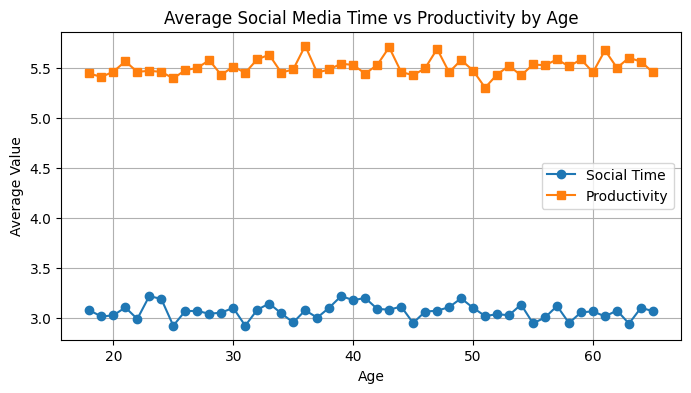

In [ ]:
# Line chart
line_data = df.groupby("age")[["social_time","productivity"]].mean()

plt.figure(figsize=(8,4))
plt.plot(line_data.index, line_data["social_time"], label="Social Time", marker='o')
plt.plot(line_data.index, line_data["productivity"], label="Productivity", marker='s')
plt.xlabel("Age")
plt.ylabel("Average Value")
plt.title("Average Social Media Time vs Productivity by Age")
plt.legend()
plt.grid(True)
plt.show()

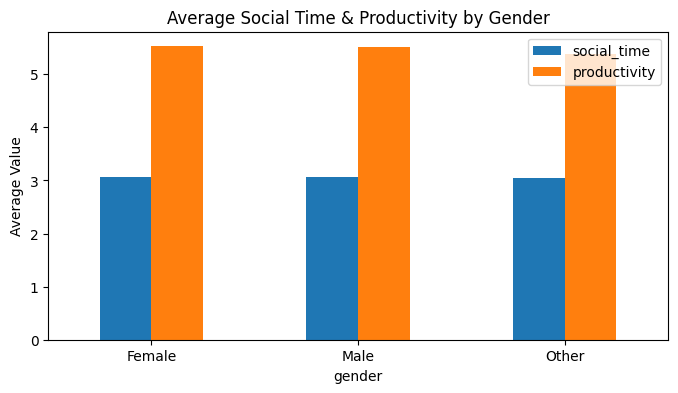

In [ ]:
# Bar chart
bar_data = df.groupby("gender")[["social_time","productivity"]].mean()

bar_data.plot(kind="bar", figsize=(8,4))
plt.title("Average Social Time & Productivity by Gender")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.show()

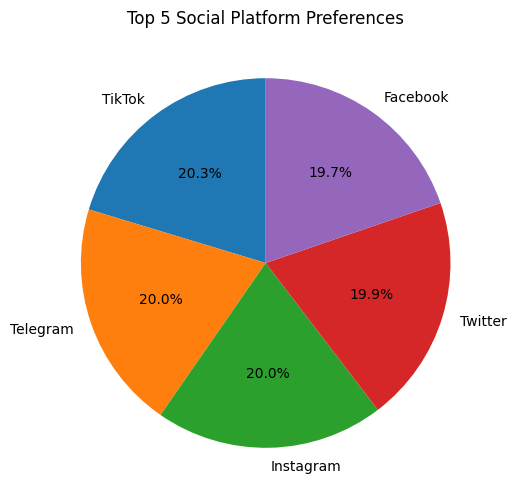

In [ ]:
# Pie chart
pie_data = df["social_platform_preference"].value_counts().head(5)  # top 5 platforms

plt.figure(figsize=(6,6))
plt.pie(pie_data, labels=pie_data.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 5 Social Platform Preferences")
plt.show()

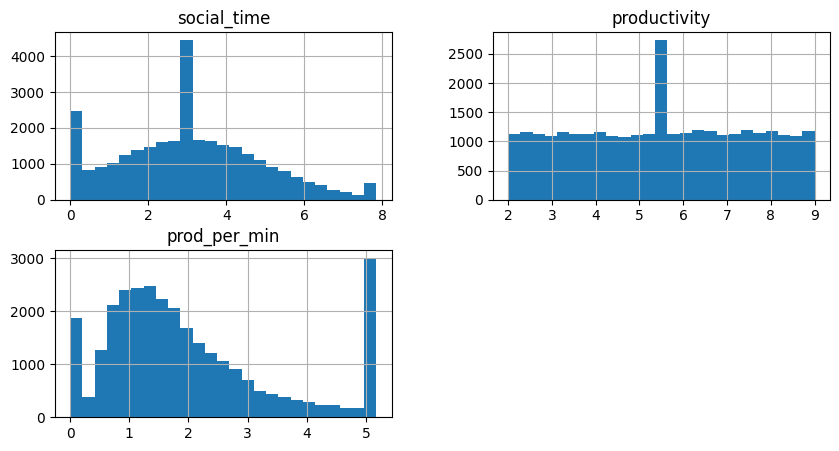

In [ ]:
# Histogram
df[['social_time','productivity','prod_per_min']].hist(bins=25, figsize=(10,5))
plt.show()

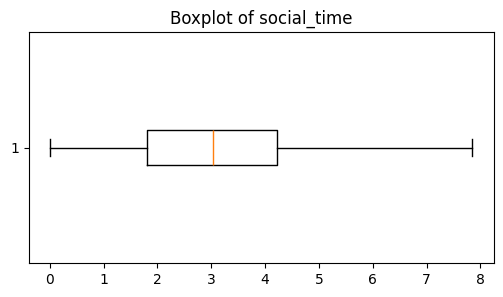

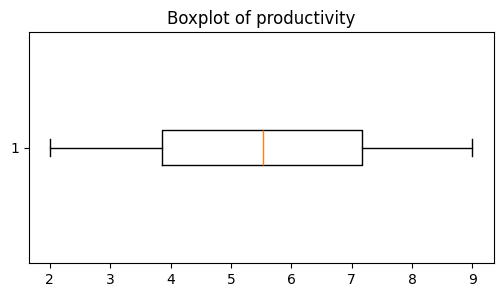

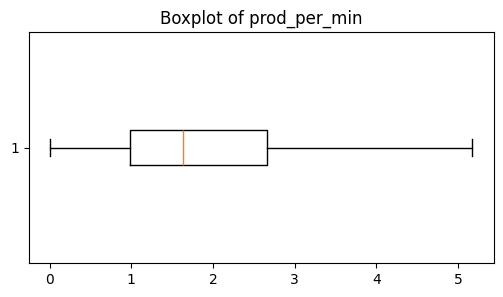

In [ ]:
# Boxplots
for col in ['social_time','productivity','prod_per_min']:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

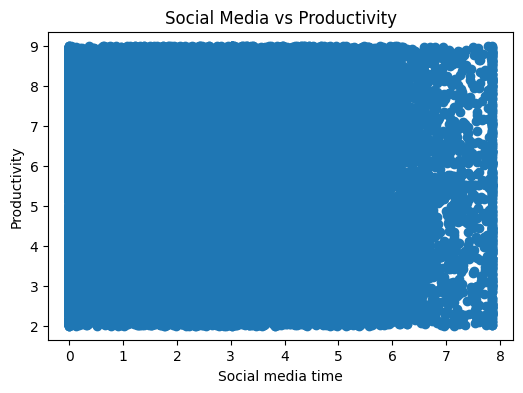

In [ ]:
# Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df['social_time'], df['productivity'])
plt.xlabel("Social media time")
plt.ylabel("Productivity")
plt.title("Social Media vs Productivity")
plt.show()

              social_time  productivity  prod_per_min
social_time      1.000000     -0.009383     -0.499929
productivity    -0.009383      1.000000      0.392643
prod_per_min    -0.499929      0.392643      1.000000


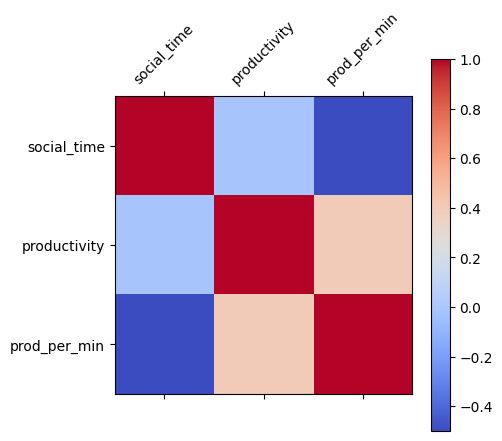

In [ ]:
# Correlation matrix
corr = df[['social_time','productivity','prod_per_min']].corr()
print(corr)
plt.matshow(corr, cmap="coolwarm")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()